# Data Exploration

## Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("ckd.csv")
data = df.drop("id",axis = 1)
Y_ori = data["CKD"]
X_ori = data.drop("CKD",axis = 1)

## Check the data   
1. check the label ratio 
2. check the dimension of dataset
3. check the type of each col
4. check missing value proportion of each col
5. Check the dummy variable

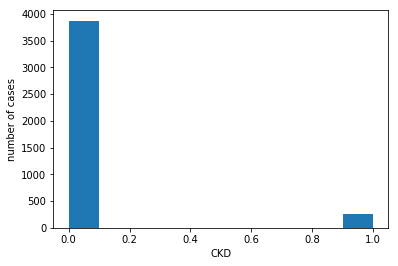

0.06873385012919897


In [2]:
#  check the label ratio 
df.CKD.plot(kind = 'hist')
plt.xlabel('CKD')
plt.ylabel('number of cases')
plt.show()
rate = (df.CKD==1).sum()/(df.CKD==0).sum()
print((df.CKD==1).sum()/(df.CKD==0).sum())

In [3]:
# dimension of datase
df.shape

(4136, 40)

In [4]:
X_ori.dtypes

Age                    int64
Female                 int64
Educ                   int64
Unmarried              int64
Income                 int64
Insured                int64
Weight               float64
Height               float64
BMI                  float64
Obese                  int64
Waist                float64
SBP                    int64
DBP                    int64
HDL                    int64
LDL                    int64
Total.Chol             int64
Dyslipidemia           int64
PVD                    int64
Activity               int64
PoorVision             int64
Smoker                 int64
Hypertension           int64
Fam.Hypertension       int64
Diabetes               int64
Fam.Diabetes           int64
Stroke                 int64
CVD                    int64
Fam.CVD                int64
CHF                    int64
Anemia                 int64
Racegrpblack           int64
Racegrphispa           int64
Racegrpother           int64
Racegrpwhite           int64
CareSourceclin

In [5]:
# check missing value proportion of each col
df.isnull().mean()

id                   0.0
Age                  0.0
Female               0.0
Educ                 0.0
Unmarried            0.0
Income               0.0
Insured              0.0
Weight               0.0
Height               0.0
BMI                  0.0
Obese                0.0
Waist                0.0
SBP                  0.0
DBP                  0.0
HDL                  0.0
LDL                  0.0
Total.Chol           0.0
Dyslipidemia         0.0
PVD                  0.0
Activity             0.0
PoorVision           0.0
Smoker               0.0
Hypertension         0.0
Fam.Hypertension     0.0
Diabetes             0.0
Fam.Diabetes         0.0
Stroke               0.0
CVD                  0.0
Fam.CVD              0.0
CHF                  0.0
Anemia               0.0
CKD                  0.0
Racegrpblack         0.0
Racegrphispa         0.0
Racegrpother         0.0
Racegrpwhite         0.0
CareSourceclinic     0.0
CareSourceDrHMO      0.0
CareSourcenoplace    0.0
CareSourceother      0.0


In [6]:
# check each col's # of unique value to see which feature is not dummy variable
for i in X_ori.columns:
    print(i + ':' + str(len(X_ori[i].unique())))

Age:66
Female:2
Educ:2
Unmarried:2
Income:2
Insured:2
Weight:928
Height:489
BMI:1870
Obese:2
Waist:708
SBP:127
DBP:94
HDL:102
LDL:249
Total.Chol:249
Dyslipidemia:2
PVD:2
Activity:4
PoorVision:2
Smoker:2
Hypertension:2
Fam.Hypertension:2
Diabetes:2
Fam.Diabetes:2
Stroke:2
CVD:2
Fam.CVD:2
CHF:2
Anemia:2
Racegrpblack:2
Racegrphispa:2
Racegrpother:2
Racegrpwhite:2
CareSourceclinic:2
CareSourceDrHMO:2
CareSourcenoplace:2
CareSourceother:2


# Feature Selection

# 1. Bayes Theory  
Here we take two examples/features (insured and hypertension) to explain how bayes prob works for feature selection. 

What we are looking for is the <b>probability of an insured person (or a persion with hypertension) has CKD </b>, so that we can infer the <b>relation between insurance (or hypertention) and CKD</b>.
<img src="CKD_bayes.png" width="70%">
As for the first example, we can calculate the Bayes prob by:  
$$P = \frac{ number\ of\ people\ with\ CKD }{ number\ of\ people\ without\ CKD  }* \frac{ 96\% }{ 79\% } = 8.3 \%$$
And for the second example, the Bayes prob is:  
$$P = \frac{ number\ of\ people\ with\ CKD }{ number\ of\ people\ without\ CKD  }* \frac{ 79\% }{ 34\% } = 15.97 \%$$

So we can see that people with hypertension have more chance of getting CKD compared to insured people.Therefore we can conclude that hypertension can be considered as a more indictive feature.

# Step  
1. Transform non-dummy features (with continous variables or multi-classes) to dummy features (with binary classes) in order to caculate the Bayes Stats
2. Calculate likelihood ratio and Bayes Stats  
3. Select the top 15 features based on Bayes Stats

In [7]:
# Transform variables to binary classes in order to caculate the Bayesion Stats
non_dummy_feat = []
for i in X_ori.columns:
    if (len(X_ori[i].unique())>2):
        non_dummy_feat.append(i)
non_dummy_feat

['Age',
 'Weight',
 'Height',
 'BMI',
 'Waist',
 'SBP',
 'DBP',
 'HDL',
 'LDL',
 'Total.Chol',
 'Activity']

In [8]:
# encode 'Activity'
df['new_Activity'] = df['Activity'].apply(lambda val:1 if val>2 else 0)
non_dummy_feat.remove('Activity')

In [9]:
for i in non_dummy_feat:
    df['new_' + i] = pd.qcut(df[i],q=2,labels=[0,1])
df = df.drop("id",axis = 1)
df.head()

,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,Obese,...,new_Age,new_Weight,new_Height,new_BMI,new_Waist,new_SBP,new_DBP,new_HDL,new_LDL,new_Total.Chol
0,65,1,0,0,1,1,56.0,162.1,21.31,0,...,1,0,0,0,0,1,0,0,1,1
1,66,1,0,1,0,1,83.9,162.5,31.77,1,...,1,1,0,1,1,0,0,0,1,1
2,54,1,1,0,0,1,69.4,160.5,26.94,0,...,1,0,0,0,0,0,0,1,1,1
3,26,0,1,0,0,1,119.3,193.2,31.96,1,...,0,1,1,1,1,1,0,0,1,1
4,66,0,1,0,0,0,85.1,172.1,28.73,0,...,1,1,1,1,1,1,1,0,0,0


In [10]:
df.dtypes

Age                     int64
Female                  int64
Educ                    int64
Unmarried               int64
Income                  int64
Insured                 int64
Weight                float64
Height                float64
BMI                   float64
Obese                   int64
Waist                 float64
SBP                     int64
DBP                     int64
HDL                     int64
LDL                     int64
Total.Chol              int64
Dyslipidemia            int64
PVD                     int64
Activity                int64
PoorVision              int64
Smoker                  int64
Hypertension            int64
Fam.Hypertension        int64
Diabetes                int64
Fam.Diabetes            int64
Stroke                  int64
CVD                     int64
Fam.CVD                 int64
CHF                     int64
Anemia                  int64
CKD                     int64
Racegrpblack            int64
Racegrphispa            int64
Racegrpoth

In [11]:
# new features are categorical variables, convert them to int
df=df.astype('int')
df.dtypes

Age                  int32
Female               int32
Educ                 int32
Unmarried            int32
Income               int32
Insured              int32
Weight               int32
Height               int32
BMI                  int32
Obese                int32
Waist                int32
SBP                  int32
DBP                  int32
HDL                  int32
LDL                  int32
Total.Chol           int32
Dyslipidemia         int32
PVD                  int32
Activity             int32
PoorVision           int32
Smoker               int32
Hypertension         int32
Fam.Hypertension     int32
Diabetes             int32
Fam.Diabetes         int32
Stroke               int32
CVD                  int32
Fam.CVD              int32
CHF                  int32
Anemia               int32
CKD                  int32
Racegrpblack         int32
Racegrphispa         int32
Racegrpother         int32
Racegrpwhite         int32
CareSourceclinic     int32
CareSourceDrHMO      int32
C

In [12]:
# filter CKD==1 and drop CKD Col
ckd=df[df.CKD==1].drop(non_dummy_feat+['Activity']+['CKD'],axis=1)
prob_ckd=[]
for col in ckd.columns:
    prob_ckd.append(ckd[col].mean())
    df_prob_ckd=pd.DataFrame(zip(ckd.columns,prob_ckd))

df_prob_ckd.columns=['features','likelihood_ckd']

In [13]:
df_prob_ckd

,features,likelihood_ckd
0,Female,0.537594
1,Educ,0.349624
2,Unmarried,0.439850
3,Income,0.281955
4,Insured,0.966165
5,Obese,0.349624
6,Dyslipidemia,0.105263
7,PVD,0.142857
8,PoorVision,0.139098
9,Smoker,0.398496


In [14]:
ckd1=df[df.CKD==0].drop(non_dummy_feat+['Activity']+['CKD'],axis=1)
prob_ckd1=[]
for col in ckd1.columns:
    prob_ckd1.append(ckd1[col].mean())
    df_prob_ckd1=pd.DataFrame(zip(ckd1.columns,prob_ckd1))

df_prob_ckd1.columns=['features','likelihood_ckd']

In [15]:
df_prob_ckd1

,features,likelihood_ckd
0,Female,0.514987
1,Educ,0.480879
2,Unmarried,0.341602
3,Income,0.457623
4,Insured,0.799483
5,Obese,0.307235
6,Dyslipidemia,0.103618
7,PVD,0.026615
8,PoorVision,0.047804
9,Smoker,0.298966


In [16]:
df_prob=pd.merge(left=df_prob_ckd,right=df_prob_ckd1,on='features')


In [17]:
df_prob['likelihood_combine']=df_prob['likelihood_ckd_x']/df_prob['likelihood_ckd_y']*rate
df_prob.sort_values('likelihood_combine',ascending=False)[0:15][['features','likelihood_combine']]

,features,likelihood_combine
14,Stroke,0.422535
7,PVD,0.368932
15,CVD,0.356725
17,CHF,0.333333
12,Diabetes,0.214085
8,PoorVision,0.200000
10,Hypertension,0.155835
28,new_Age,0.145152
18,Anemia,0.114286
33,new_SBP,0.112885


In [18]:
# get feature names for modeling, they are in Dec order
comb_prob_col=list(df_prob.sort_values('likelihood_combine',ascending=False)[0:15]['features'])
for index,i in enumerate(comb_prob_col):
    if i.split('_')[0] == 'new':
        print(i)
        comb_prob_col[index] = i.split('_')[1]

new_Age
new_SBP
new_Waist


Here are the features selected by Bayes Stats

In [19]:
comb_prob_col

['Stroke',
 'PVD',
 'CVD',
 'CHF',
 'Diabetes',
 'PoorVision',
 'Hypertension',
 'Age',
 'Anemia',
 'SBP',
 'Racegrpwhite',
 'Waist',
 'Smoker',
 'Unmarried',
 'CareSourceDrHMO']

# 2. Random Forest

Random Forest is a very interpretable model which can derive the importance of each feature on the tree decision. In other words, it is easy to compute how much each feature is contributing to the decision.

# Step:

1. Preprocess the input data  
a. Make all continuous variables normally distributed (IMPORTANT for modelling!)  
b. Feature Scaling (<b>Standarlization</b> or Normalization) (Note: It is a good practice to fit the scaler on the training data and then use it to transform the testing data. This would avoid any data leakage during the model testing process. Also, the scaling of target values is generally not required.) Also, you can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results
2. Build the Random Forest Model and calculate the feature importance

Preprocessing

In [20]:
from imblearn.over_sampling import SMOTE, ADASYN
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
from imblearn.combine import SMOTEENN
from matplotlib import rcParams
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import pandas as pd

Using TensorFlow backend.


In [21]:
continous_features = ['Age', 'Weight','Height', 'BMI', 'Waist', 'SBP', 'DBP', 'HDL', 'LDL','Total.Chol']
print(X_ori[continous_features].var())

Age            330.931916
Weight         368.011677
Height         100.421709
BMI             37.317719
Waist          229.725963
SBP            401.445712
DBP            147.855385
HDL            246.894918
LDL           1787.429386
Total.Chol    1765.527074
dtype: float64


In [22]:
from scipy.stats import norm, skew
from scipy.special import boxcox1p
X_norm=X_ori.copy()
lam = 0.15
for feat in continous_features:
    X_norm[feat] = boxcox1p(X_norm[feat], lam)
print(X_norm[continous_features].var())

Age           0.478916
Weight        0.198258
Height        0.016409
BMI           0.109262
Waist         0.093314
SBP           0.099419
DBP           0.118014
HDL           0.271302
LDL           0.347514
Total.Chol    0.204248
dtype: float64


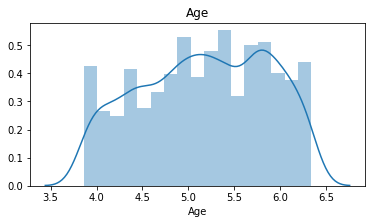

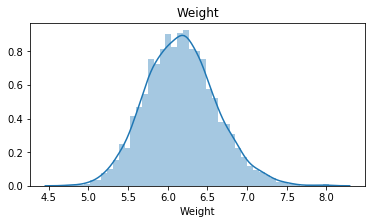

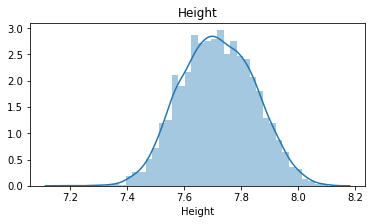

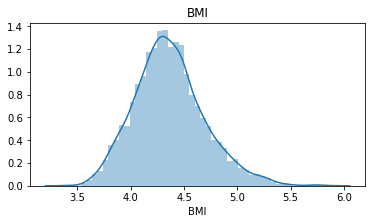

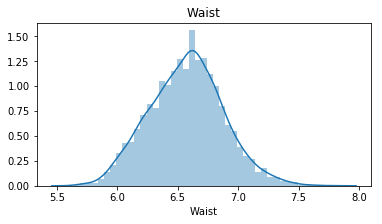

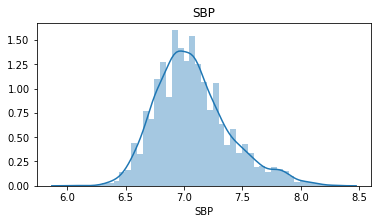

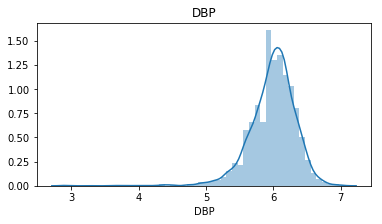

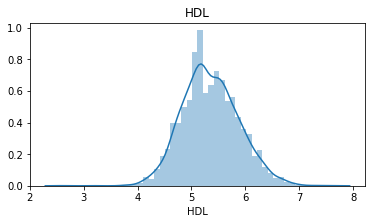

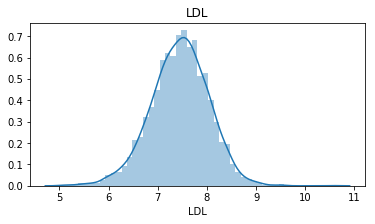

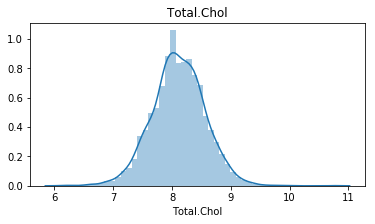

In [23]:
for i in continous_features:
    plt.figure(figsize=(6, 3))
    plt.title(i)
    ax = sns.distplot(X_norm[i]) 

In [25]:
from sklearn.model_selection import train_test_split
Y=Y_ori.copy()
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, stratify=Y,test_size=0.2, random_state=42)  

Standardizatoion

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_norm_std_train=X_train.copy()
X_norm_std_test=X_test.copy()
normalizer = StandardScaler()
normalizer.fit(X_train)
X_norm_std_train_input = normalizer.transform(X_norm_std_train)
X_norm_std_test_input = normalizer.transform(X_norm_std_test)

Build Random Forest Model  

Derive 1st model (Random Forest using all features)

In [27]:
model = RandomForestClassifier()  
model.fit(X_norm_std_train_input, y_train)  
y_pred = model.predict(X_norm_std_test_input) 

Calculate feature importance

In [28]:
from pandas import Series,DataFrame
features = {}
for index,i in enumerate(X_norm_std_train.columns.values.tolist()):
    features[i] = model.feature_importances_.tolist()[index]
feat_importance=pd.DataFrame(zip(X_norm_std_train.columns, model.feature_importances_))

In [29]:
feat_importance.columns=['features','feature importance']
feat_importance.sort_values('feature importance',ascending=False)
select_features = list(feat_importance.sort_values('feature importance',ascending=False)[0:15]['features'])
select_features

['Age',
 'SBP',
 'Height',
 'Weight',
 'BMI',
 'Total.Chol',
 'DBP',
 'HDL',
 'Waist',
 'LDL',
 'Activity',
 'CVD',
 'Hypertension',
 'PVD',
 'Diabetes']

Get common features for later modeling, they are in Dec order

In [30]:
common_col=list(set(comb_prob_col) & set(select_features))
common_col

['CVD', 'Age', 'Diabetes', 'Hypertension', 'SBP', 'PVD', 'Waist']

Derive 2nd model (Random Forest using RF selected features)

In [31]:
# Random Forest using selected features
model_rf = RandomForestClassifier()  
normalizer = StandardScaler()
normalizer.fit(X_norm_std_train[select_features])
X_norm_std_train_select = normalizer.transform(X_norm_std_train[select_features])
X_norm_std_test_select = normalizer.transform(X_norm_std_test[select_features])
model_rf.fit(X_norm_std_train_select, y_train)  
y_pred_rf = model_rf.predict(X_norm_std_test_select) 

# Feature Selection by Logistic Regression (p-value)

In [32]:
import statsmodels.api as sm
x = sm.add_constant(X_norm_std_train_select)
model = sm.Logit(y_train, x)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.167729
         Iterations 9


In [33]:
# look at the summary of model 
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                    CKD   No. Observations:                 3308
Model:                          Logit   Df Residuals:                     3292
Method:                           MLE   Df Model:                           15
Date:                Thu, 27 Aug 2020   Pseudo R-squ.:                  0.2978
Time:                        10:26:31   Log-Likelihood:                -554.85
converged:                       True   LL-Null:                       -790.21
                                        LLR p-value:                 8.706e-91
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3840      0.208    -21.028      0.000      -4.793      -3.975
x1             2.0998      0.200     10.509      0.000       1.708       2.491
x2            -0.1508      0.094     -1.613      0.1

In [34]:
result.pvalues[result.pvalues<0.05]

const    3.607899e-98
x1       7.841875e-26
x11      4.567919e-03
x12      2.519306e-03
x13      7.446808e-04
x14      3.491910e-03
dtype: float64

In [35]:
select_features1 = ['Age','CVD','Hypertension','PVD','Activity',]

# Imbalance Problem


From very begining of the notebook, we can find the class ratio of our dataset is 0.067, which means our dataset has a big unbalaced representation among the classes. <b> When the imbalance is larger, the classification accuracy on the smaller class will tend to be lower. </b> In particularly, when a class is of great interest but occurs relatively rarely, such as instances of CKD (or cases of fraud), it is important to accurately identify them.


There are two common methods for imbalance problem:
1. <b>Oversampling</b> technique is to randomly duplicate examples in the minority class. However, this will easily cause overfitting issues. <b>SMOTE</b> is an advanced oversampling techinique, it's not just copying the existing instances from minority class. Instead, the algorithm takes samples of the feature space for each target class and its nearest neighbors, and generates new examples that combine features of the target case with features of its neighbors.
2. <b>Undersampling</b> technique is to randomly remove samples from the majority class and this will potentially discard some important samples. <b>EasyEnsemble</b> is to samples several subsets from the majority class to create a balanced dataset. A classifier is then trained on this reduced dataset and generate predictions for the test set. This procedure is repeated multiple times, and the outputs of those learners are finally combined.


In this project, I'm going to use <b>EasyEnsemble</b> because the imbalance in our case is really huge.

In [36]:
from imblearn.ensemble import EasyEnsembleClassifier 
from collections import Counter
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt

Derive 3rd model (EasyEnsemble with RF selected features)

In [37]:
clf1 = LogisticRegression()
eec1 = EasyEnsembleClassifier(base_estimator=clf1,replacement=False,n_estimators=14,random_state=2)
eec1.fit(X_norm_std_train_select, y_train) # choose the features for training and test at the same time
y_pred1 = eec1.predict(X_norm_std_test_select)

Derive 4th model (EasyEnsemble with LR selected features)

In [38]:
normalizer = StandardScaler()
normalizer.fit(X_norm_std_train[select_features1])
X_norm_std_train_select1 = normalizer.transform(X_norm_std_train[select_features1])
X_norm_std_test_select1 = normalizer.transform(X_norm_std_test[select_features1])
clf2 = LogisticRegression()
eec2 = EasyEnsembleClassifier(base_estimator=clf2,replacement=False,n_estimators=14,random_state=2)
eec2.fit(X_norm_std_train_select1, y_train) # choose the features for training and test at the same time
y_pred2 = eec2.predict(X_norm_std_test_select1)

Derive 5th model (EasyEnsemble with Bayes selected features)

In [39]:
normalizer = StandardScaler()
normalizer.fit(X_norm_std_train[comb_prob_col])
X_norm_std_train_select2 = normalizer.transform(X_norm_std_train[comb_prob_col])
X_norm_std_test_select2 = normalizer.transform(X_norm_std_test[comb_prob_col])
clf3 = LogisticRegression()
eec3 = EasyEnsembleClassifier(base_estimator=clf3,replacement=False,n_estimators=14,random_state=2)
eec3.fit(X_norm_std_train_select2, y_train) # choose the features for training and test at the same time
y_pred3 = eec3.predict(X_norm_std_test_select2)

Derive 6th model (EasyEnsemble with [RF + Bayes] selected features)

In [40]:
normalizer = StandardScaler()
normalizer.fit(X_norm_std_train[common_col])
X_norm_std_train_select3 = normalizer.transform(X_norm_std_train[common_col])
X_norm_std_test_select3 = normalizer.transform(X_norm_std_test[common_col])
clf4 = LogisticRegression()
eec4 = EasyEnsembleClassifier(base_estimator=clf4,replacement=False,n_estimators=14,random_state=2)
eec4.fit(X_norm_std_train_select3, y_train) # choose the features for training and test at the same time
y_pred4 = eec4.predict(X_norm_std_test_select3)

# Model Comparison

## Confusion Matrix

Confusion Matrix is a performance measurement for machine learning classification problem where the output can two or more classes. It is a table of 4 combination of predictions and actual values.

<img src="confusion_matrix.png" width="40%">

It is useful to measure the <b> Accuracy, Recall, Precision and AUC-ROC Curve. </b>

$$Accuracy = \frac{ TP + TN }{ TP + FN + TN + FP }$$

(However, accuracy is a good measure only for symmetric dataset.)

$$Recall = \frac{ TP }{ TP + FN  }$$

(High recall relates to the low false negative rate. Think about the cancer detection case.)

$$Precision = \frac{ TP }{ TP + FP  }$$

(High precision relates to the low false positive rate.)


<b>F1-score</b> helps to measure the recall and precision at the same time, taking both false positives and false negatives into account.

$$F1-score = \frac{ 2*(Recall * Precision) }{ Recall + Precision }$$


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85       775
           1       0.20      0.94      0.33        53

    accuracy                           0.75       828
   macro avg       0.60      0.84      0.59       828
weighted avg       0.94      0.75      0.81       828



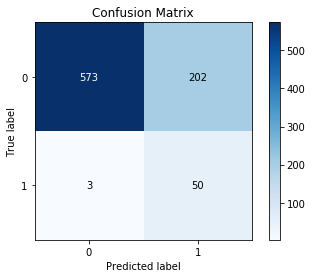

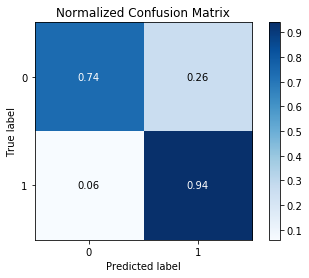

In [42]:
#confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred1, normalize=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred1, normalize=True)
plt.show()

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85       775
           1       0.19      0.91      0.32        53

    accuracy                           0.75       828
   macro avg       0.59      0.82      0.58       828
weighted avg       0.94      0.75      0.81       828



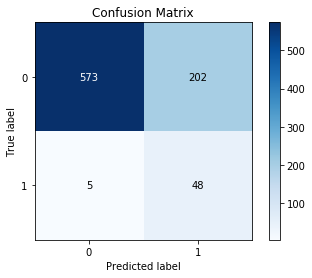

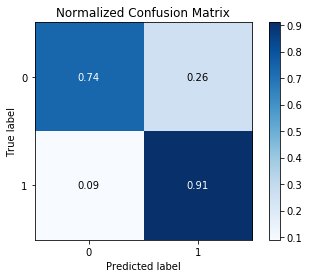

In [44]:
#confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred2, normalize=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred2, normalize=True)
plt.show()

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86       775
           1       0.21      0.94      0.35        53

    accuracy                           0.77       828
   macro avg       0.60      0.85      0.60       828
weighted avg       0.94      0.77      0.83       828



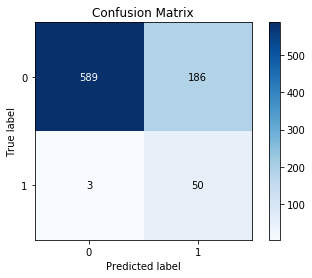

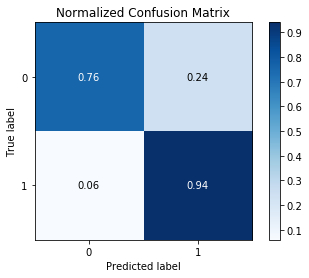

In [46]:
#confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred3, normalize=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred3, normalize=True)
plt.show()

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86       775
           1       0.21      0.94      0.35        53

    accuracy                           0.77       828
   macro avg       0.60      0.85      0.60       828
weighted avg       0.94      0.77      0.83       828



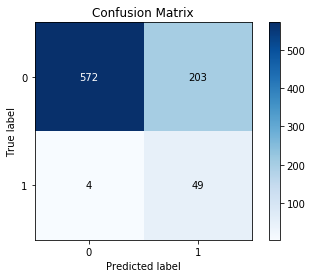

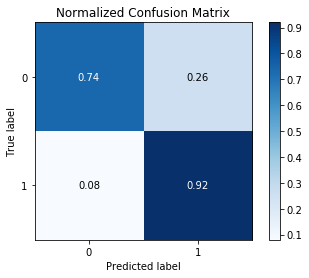

In [48]:
#confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred4, normalize=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred4, normalize=True)
plt.show()

# ROC-AUC Curve

Firstly, let's go through the following terms:

$$Recall/Sensitivity/TPR(True\ Positive\ Rate) = \frac{ TP }{ TP + FN  }$$

$$Specificity = \frac{ TF }{ TF + FP }$$

$$FPR(False\ Positive\ Rate) = 1 - Specificity = \frac{ FP }{ TN + FP }$$


ROC (Reciever Operating Characteristics) curve is a probability curve and AUC (Area Under Curve) represents degree of or measure of separability. Higher the AUC, better the model can distinguish between different classes.

<img src="ROC_AUC.png" width="40%">

The ROC is plotted with TPR against FPR where TPR is on y-axis and FPR is on x-axis. We can have different confusion matrixs with different thresholds, and we can derive different points (TPR,FPR). After connecting all the points, we can have our ROC curve.


## Important Note

Depending on how many FPR I'm willing to accept, the optimal threshold maybe different. For example, in our case, we need to accurately identify every disease case, therefore, we prefer to chose threshold 2 with low TPR but lower FPR.


<img src="ROC.png" width="40%">

In [49]:
# get the probabilities
y_pred_prob1 = eec1.predict_proba(X_norm_std_test_select)
y_pred_prob2 = eec2.predict_proba(X_norm_std_test_select1)
y_pred_prob3 = eec3.predict_proba(X_norm_std_test_select2)
y_pred_prob4 = eec4.predict_proba(X_norm_std_test_select3)
y_pred_prob5 = model_rf.predict_proba(X_norm_std_test_select)

In [50]:
# only get CKD=1 probabilities
prob1=eec1.predict_proba(X_norm_std_test_select)[::,1]
prob2=eec2.predict_proba(X_norm_std_test_select1)[::,1]
prob3=eec3.predict_proba(X_norm_std_test_select2)[::,1]
prob4=eec4.predict_proba(X_norm_std_test_select3)[::,1]
prob5=model_rf.predict_proba(X_norm_std_test_select)[::,1]

In [51]:
# ROC
from sklearn.metrics import roc_curve, roc_auc_score

result_table = pd.DataFrame(columns=['fpr','tpr','auc'])
probs=[prob1,prob2,prob3,prob4,prob5]
for prob in probs:        
    fpr, tpr, _ = roc_curve(y_test,  prob)
    auc = roc_auc_score(y_test, prob)
    
    result_table = result_table.append({'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [52]:
result_table.index=['fea1_ensembling','fea2_ensembling','fea3_ensembling', 'fea4_ensembling','fea1_rf']
result_table

,fpr,tpr,auc
fea1_ensembling,"[0.0, 0.0012903225806451613, 0.001290322580645...","[0.0, 0.0, 0.03773584905660377, 0.037735849056...",0.916957
fea2_ensembling,"[0.0, 0.0, 0.0025806451612903226, 0.0025806451...","[0.0, 0.018867924528301886, 0.0188679245283018...",0.904662
fea3_ensembling,"[0.0, 0.0, 0.0012903225806451613, 0.0012903225...","[0.0, 0.018867924528301886, 0.0188679245283018...",0.915496
fea4_ensembling,"[0.0, 0.0012903225806451613, 0.001290322580645...","[0.0, 0.0, 0.05660377358490566, 0.056603773584...",0.912209
fea1_rf,"[0.0, 0.0, 0.0012903225806451613, 0.0025806451...","[0.0, 0.018867924528301886, 0.0188679245283018...",0.889117


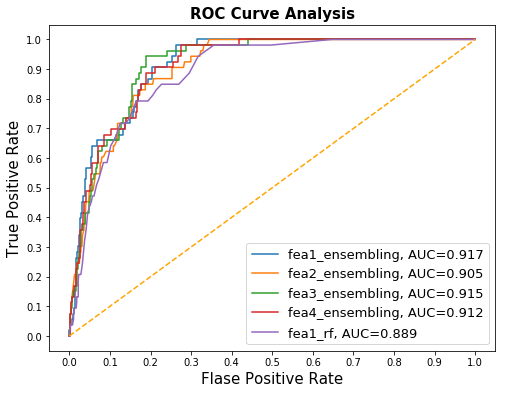

In [53]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# fea1_ensembling: features are selected by Random Forest, using easy ensembling for imbalanced data
# fea2_ensembling: features are selected by StatisModel, using easy ensembling for imbalanced data
# fea3_ensembling: features are selected by Bayes Statistics, using easy ensembling for imbalanced data
# fea4_ensembling: features are common features of fea1 and fea3, using easy ensembling for imbalanced data
# fea1_rf: features are selected by Random Forest using imbalanced data

# fea3_ensembling is the optimal one

## Evaluation

Here are some findings from above ROC curve:

1. As for AUC, the blue curve performs the best among all results.
2. The green curve is able to have lower FPR, which should be considered first in our case.
3. The purple curve performs the worst which indicates that Easy ensembling method is useful to address the imbalance data issue.

## Model Interpretation

Now we can calculate the average coef of each features, they are in Dec order

In [95]:
coefs = []
for pipeline in eec3.estimators_:
    coefs.append(abs(pipeline[1].coef_))
coefs = np.array(coefs).mean(axis=0)
coefs

array([[0.15236089, 0.12008294, 0.12183483, 0.13086754, 0.23031774,
        0.06008996, 0.40080363, 1.70656321, 0.21154441, 0.09203066,
        0.22157383, 0.12282013, 0.13277089, 0.0897521 , 0.10941679]])

In [96]:
features_bayes = pd.DataFrame({'features':comb_prob_col,'coef':list(coefs.ravel())})
features_bayes.sort_index(axis = 0,ascending = False,by=['coef'])

C:\Users\yangw\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


,features,coef
7,Age,1.706563
6,Hypertension,0.400804
4,Diabetes,0.230318
10,Racegrpwhite,0.221574
8,Anemia,0.211544
0,Stroke,0.152361
12,Smoker,0.132771
3,CHF,0.130868
11,Waist,0.122820
2,CVD,0.121835


Now we decide to chose top 6 features to simplify the model

In [104]:
top_6 = features_bayes.sort_index(axis = 0,ascending = False,by=['coef'])[:6]

C:\Users\yangw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [105]:
top_6_features = list(top_6['features'])
top_6_features

['Age', 'Hypertension', 'Diabetes', 'Racegrpwhite', 'Anemia', 'Stroke']

In [106]:
normalizer = StandardScaler()
normalizer.fit(X_norm_std_train[top_6_features])
X_norm_std_train_select_top6 = normalizer.transform(X_norm_std_train[top_6_features])
X_norm_std_test_select_top6 = normalizer.transform(X_norm_std_test[top_6_features])
clf = LogisticRegression()
eec_top6 = EasyEnsembleClassifier(base_estimator=clf,replacement=False,n_estimators=14,random_state=2)
eec_top6.fit(X_norm_std_train_select_top6, y_train) # choose the features for training and test at the same time
y_pred_top6 = eec_top6.predict(X_norm_std_test_select_top6)

In [108]:
print(classification_report(y_test, y_pred_top6, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86       775
           1       0.20      0.89      0.33        53

    accuracy                           0.77       828
   macro avg       0.60      0.82      0.60       828
weighted avg       0.94      0.77      0.83       828



We can see that removing last 9 features doesn't chaneg our result

In [109]:
coefs = []
for pipeline in eec_top6.estimators_:
    coefs.append(pipeline[1].coef_)
coefs = np.array(coefs).mean(axis=0)
coefs

array([[1.72968446, 0.39944954, 0.25591995, 0.23889639, 0.22408358,
        0.21032557]])

Now, we chose following features as our survey questions

In [110]:
pd.DataFrame({'features':top_6_features,'coef':list(coefs.ravel())})

,features,coef
0,Age,1.729684
1,Hypertension,0.399450
2,Diabetes,0.255920
3,Racegrpwhite,0.238896
4,Anemia,0.224084
5,Stroke,0.210326


In [111]:
# get the average intercept
intercepts = []
for pipeline in eec_top6.estimators_:
    intercepts.append(pipeline[1].intercept_)
intercepts = np.array(intercepts).mean(axis=0)
print(intercepts)

[-1.49111644]


### Formular Interpretation

$$ln(p/1-p)= -1.49111644 + Age * 1.729684 + Hypertension * 0.399450 + Diabetes * 0.255920 + Racegrpwhite * 0.238896 + Anemia * 0.224084 + Stroke * 0.210326 $$